## Building a cluster model using Kmeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
tracks=pd.read_pickle(r'.\datasets\songs_wt_aft.pkl')
tracks.head()

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,0,-6.839,1,0.0321,0.731000,...,0.1890,0.557,95.263,audio_features,3AhXZa8sUQht0UEdBJgpGc,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,1,-9.027,1,0.0495,0.000012,...,0.1380,0.767,116.835,audio_features,3oTlkzk1OtrhH8wBAduVEi,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,4,-14.162,0,0.0675,0.290000,...,0.9220,0.175,163.219,audio_features,3ZFBeIyP41HhnALjxWy1pR,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,1,-10.934,1,0.0388,0.082200,...,0.0891,0.331,133.574,audio_features,5Qt4Cc66g24QWwGP3YYV9y,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,10,-10.851,1,0.0915,0.735000,...,0.3170,0.968,166.429,audio_features,7MH2ZclofPlTrZOkPzZKhK,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4


In [4]:
tracks.shape

(10909, 21)

In [5]:
#as we have song_id which is same as id
tracks=tracks.drop('id',axis=1)

In [6]:
X=tracks.select_dtypes(np.number)

In [7]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.482,0.721,0,-6.839,1,0.0321,0.731000,0.000000,0.1890,0.557,95.263,369600,4
1,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,116.835,300977,4
2,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,337413,4
3,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,219147,4
4,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,166.429,160893,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,0.332,0.707,7,-12.698,1,0.0361,0.000012,0.006120,0.1100,0.652,144.815,199467,4
10905,0.464,0.749,6,-8.564,1,0.4800,0.224000,0.000046,0.3510,0.879,181.121,201800,4
10906,0.694,0.710,2,-9.793,1,0.3400,0.527000,0.001350,0.0697,0.415,119.964,183040,4
10907,0.332,0.800,1,-9.746,1,0.0326,0.000368,0.001600,0.0850,0.832,149.240,222160,4


In [8]:
scaler=StandardScaler()
X_prep = scaler.fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=X.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.536603,0.454178,-1.493969,0.600169,0.662422,-0.538622,1.309486,-0.437923,-0.010264,-0.076103,-0.920680,0.889352,0.213365
1,-0.518905,1.064960,-1.213366,0.032806,0.662422,-0.327496,-0.938957,-0.369671,-0.339633,0.780652,-0.148243,0.353599,0.213365
2,-1.232731,-0.681359,-0.371557,-1.298734,-1.509613,-0.109090,-0.046984,-0.437476,4.723613,-1.634581,1.512647,0.638062,0.213365
3,-1.032152,-0.870616,-1.213366,-0.461692,0.662422,-0.457326,-0.686156,-0.437816,-0.655440,-0.998135,0.451137,-0.285264,0.213365
4,-0.324225,0.604723,1.312062,-0.440170,0.662422,0.182119,1.321790,-0.437661,0.816389,1.600689,1.627589,-0.740065,0.213365


### Choosing K

#### Elbow Method

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:24<00:00,  2.00it/s]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

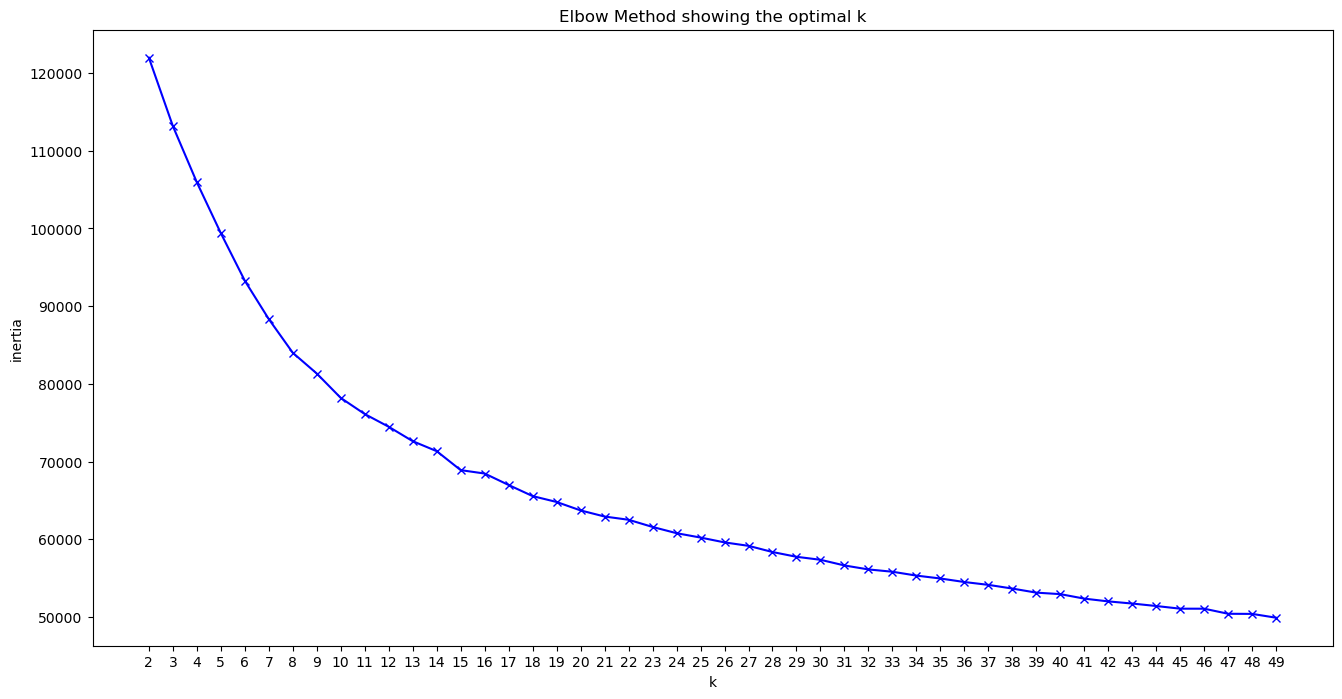

In [9]:
K = range(2, 50)
inertia = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Silhouette Score

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [01:20<00:00,  1.68s/it]


Text(0.5, 1.0, 'Silhouette score showing the optimal k')

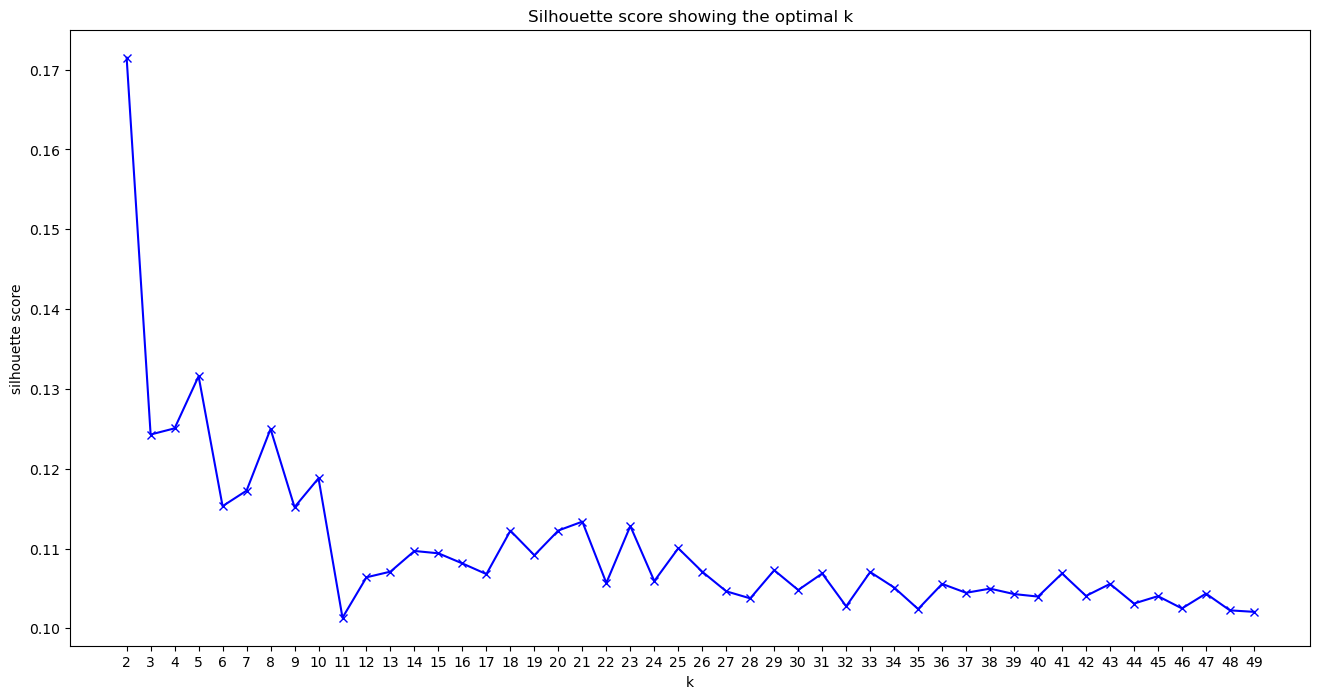

In [10]:
from sklearn.metrics import silhouette_score
K = range(2, 50)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

- Elbow method is not very readable to select a value of K
- Select K based on silhouette score

##### Model 1: K=5

In [11]:
k=5
kmeans_5 = KMeans(n_clusters=k,
                    random_state=1234)
kmeans_5.fit(X_prep)

KMeans(n_clusters=5, random_state=1234)

In [12]:
pd.DataFrame(kmeans_5.predict(X_prep)).value_counts()

0    4549
3    2310
4    2276
2    1093
1     681
dtype: int64

In [13]:
pred_5=kmeans_5.predict(X_prep)
len(pred_5)

10909

##### Model 2: K=8

In [14]:
k=8
kmeans_8 = KMeans(n_clusters=k,
                    random_state=1234)
kmeans_8.fit(X_prep)

KMeans(random_state=1234)

In [15]:
pd.DataFrame(kmeans_8.predict(X_prep)).value_counts()

5    2735
0    1881
7    1878
1    1840
3     946
4     825
2     654
6     150
dtype: int64

In [16]:
pred_8=kmeans_8.predict(X_prep)

##### Model 3: K=21

In [17]:
k=21
kmeans_21 = KMeans(n_clusters=k,
                    random_state=1234)
kmeans_21.fit(X_prep)

KMeans(n_clusters=21, random_state=1234)

In [18]:
pred_21=kmeans_21.predict(X_prep)
len(pred_21)

10909

In [19]:
pd.DataFrame(kmeans_21.predict(X_prep)).value_counts()

20    1057
17    1032
0      847
6      783
10     687
4      647
9      642
11     636
1      607
8      532
19     484
18     476
7      464
12     448
5      346
15     314
2      308
16     297
3      183
14      63
13      56
dtype: int64

### Creating a dataframe of the transformed data and the clusters

In [20]:
tracks['k5_clusters']=pred_5
tracks['k8_clusters']=pred_8
tracks['k21_clusters']=pred_21

In [21]:
tracks.head()

,track.name,name,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,k5_clusters,k8_clusters,k21_clusters
0,Like a Rolling Stone,Bob Dylan,3AhXZa8sUQht0UEdBJgpGc,0.482,0.721,0,-6.839,1,0.0321,0.731000,...,95.263,audio_features,spotify:track:3AhXZa8sUQht0UEdBJgpGc,https://api.spotify.com/v1/tracks/3AhXZa8sUQht...,https://api.spotify.com/v1/audio-analysis/3AhX...,369600,4,0,5,0
1,Smells Like Teen Spirit,Nirvana,3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,1,-9.027,1,0.0495,0.000012,...,116.835,audio_features,spotify:track:3oTlkzk1OtrhH8wBAduVEi,https://api.spotify.com/v1/tracks/3oTlkzk1Otrh...,https://api.spotify.com/v1/audio-analysis/3oTl...,300977,4,0,5,17
2,A Day In The Life - Remastered,The Beatles,3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,4,-14.162,0,0.0675,0.290000,...,163.219,audio_features,spotify:track:3ZFBeIyP41HhnALjxWy1pR,https://api.spotify.com/v1/tracks/3ZFBeIyP41Hh...,https://api.spotify.com/v1/audio-analysis/3ZFB...,337413,4,4,7,19
3,Good Vibrations (Mono),The Beach Boys,5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,1,-10.934,1,0.0388,0.082200,...,133.574,audio_features,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,https://api.spotify.com/v1/tracks/5Qt4Cc66g24Q...,https://api.spotify.com/v1/audio-analysis/5Qt4...,219147,4,4,7,0
4,Johnny B Goode,Chuck Berry,7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,10,-10.851,1,0.0915,0.735000,...,166.429,audio_features,spotify:track:7MH2ZclofPlTrZOkPzZKhK,https://api.spotify.com/v1/tracks/7MH2ZclofPlT...,https://api.spotify.com/v1/audio-analysis/7MH2...,160893,4,0,5,7


In [22]:
tracks.to_pickle(r'.\datasets\songs_wt_clusters.pkl')

### Saving the scaler and models using pickle

In [23]:
pickle.dump(kmeans_5,open(r'.\models\kmeans_5.sav','wb'))
pickle.dump(kmeans_8,open(r'.\models\kmeans_8.sav','wb'))
pickle.dump(kmeans_21,open(r'.\models\kmeans_21.sav','wb'))

In [24]:
pickle.dump(scaler,open(r'.\models\scaler.pkl','wb'))